In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns




In [15]:
sns.set_style("white")


In [16]:
# Load dataset
data_path = '/Users/apple/Documents/Python/fintech_presentation/model/accepted_2007_to_2018Q4.csv'
data = pd.read_csv(data_path)



/var/folders/56/byw1pvks5j174bp7hqkgqqw80000gn/T/ipykernel_37151/1606900582.py:3: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


In [17]:
# Display basic information about the dataset
print(data.head())
print(data.info())



         id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN     3600.0       3600.0           3600.0   36 months   
1  68355089        NaN    24700.0      24700.0          24700.0   36 months   
2  68341763        NaN    20000.0      20000.0          20000.0   60 months   
3  66310712        NaN    35000.0      35000.0          35000.0   60 months   
4  68476807        NaN    10400.0      10400.0          10400.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.99       123.03     C        C4  ...                            NaN   
1     11.99       820.28     C        C1  ...                            NaN   
2     10.78       432.66     B        B4  ...                            NaN   
3     14.85       829.90     C        C5  ...                            NaN   
4     22.45       289.91     F        F1  ...                            NaN   

  hardship_last_payment_amount disbursement_

In [18]:
features = ['loan_amnt', 'annual_inc', 'term', 'emp_length']
target = 'loan_status'



In [20]:
# Filter data to include only specific loan statuses
filtered_data = data.query("loan_status in ('Fully Paid', 'Charged Off')").copy()



In [21]:
# Encode target variable (Fully Paid -> 1, Charged Off -> 0)
filtered_data[target] = LabelEncoder().fit_transform(filtered_data[target])



In [22]:
# Handle missing values (drop rows with missing data for simplicity)
filtered_data.dropna(subset=features, inplace=True)



In [23]:
# Split data into features (X) and target (y)
X = filtered_data[features]
y = filtered_data[target]



In [24]:
# Preprocess categorical features
X = pd.get_dummies(X, columns=['term', 'emp_length'], drop_first=True)



In [25]:
# Scale numerical features
scaler = MinMaxScaler()
X[['loan_amnt', 'annual_inc']] = scaler.fit_transform(X[['loan_amnt', 'annual_inc']])



In [26]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [27]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [29]:

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]



In [30]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)


In [31]:
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.7753670666245658
ROC AUC: 0.5800463694371961

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.10      0.15     49550
           1       0.81      0.94      0.87    203810

    accuracy                           0.78    253360
   macro avg       0.55      0.52      0.51    253360
weighted avg       0.71      0.78      0.73    253360



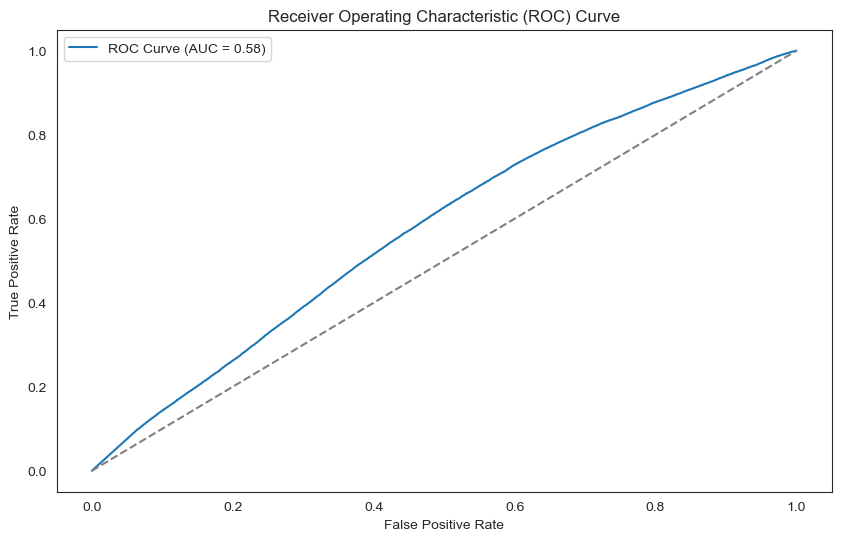

In [32]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()